In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from astropy.time import Time

In [2]:
filename = 'oh3573s2.ts'

Expected input format is comma separated data columns containing timeseries of spectra over velocity per channel

In [3]:
with open(filename, 'r') as fin:
    # human text line
    comment = fin.readline()
    # header info line
    header = fin.readline()
    # spectral channels timeseries
    data = fin.readlines()

# human readable string for information
print comment
# timestamps [channel velocities]
print header
chan_vel = np.array(header.strip().split(',')[1:-1], dtype=float)

OH357.3-1.3  OH1612 time series of intensities F from oh3573s2.sf

JDm2440000,      -41.820,     -41.355,     -40.890,     -40.425,     -39.960,     -39.496,     -39.031,     -38.566,     -38.101,     -37.636,     -37.171,     -36.706,     -36.242,     -35.777,     -35.312,     -34.847,     -34.382,     -33.917,     -33.452,     -32.987,     -32.523,     -32.058,     -31.593,     -31.128,     -30.663,     -30.198,     -29.733,     -29.268,     -28.804,     -28.339,     -12.998,     -12.533,     -12.068,     -11.603,     -11.139,     -10.674,     -10.209,      -9.744,      -9.279,      -8.814,      -8.349,      -7.884,      -7.420,      -6.955,      -6.490,      -6.025,      -5.560,      -5.095,      -4.630,      -4.165,      -3.701,      -3.236,      -2.771,      -2.306,      -1.841,      -1.376,



In [4]:
for cntr, line in enumerate(data):
    if cntr < 1:
        file_data = np.array(line.strip().split(',')[:-1], dtype=float)
    else:
        file_data = np.vstack([file_data, np.array(line.strip().split(',')[:-1], dtype=float)])
print 'Input data size (#ts, #ch) = {}'.format(file_data.shape)

Input data size (#ts, #ch) = (263, 57)


Layout of data per row:
* First column is timestamps in DJ - epoch
* Remaining columns are spectral channels

In [5]:
# from header JDm2440000 = JD - 2440000 (epoch)
timestamps = file_data[:,0]
ts_jd = Time(timestamps + 2440000, format='jd')

In [6]:
spectra = file_data[:,1:]
[nts, nch] = spectra.shape
print 'Spectral data size (#ts, #ch) = {}'.format(nts, nch)

Spectral data size (#ts, #ch) = 263


In [7]:
(x, y) = np.meshgrid(np.asarray(timestamps, dtype=float), chan_vel)
z = spectra.T

Text(0.5,0,'flux [Jy]')

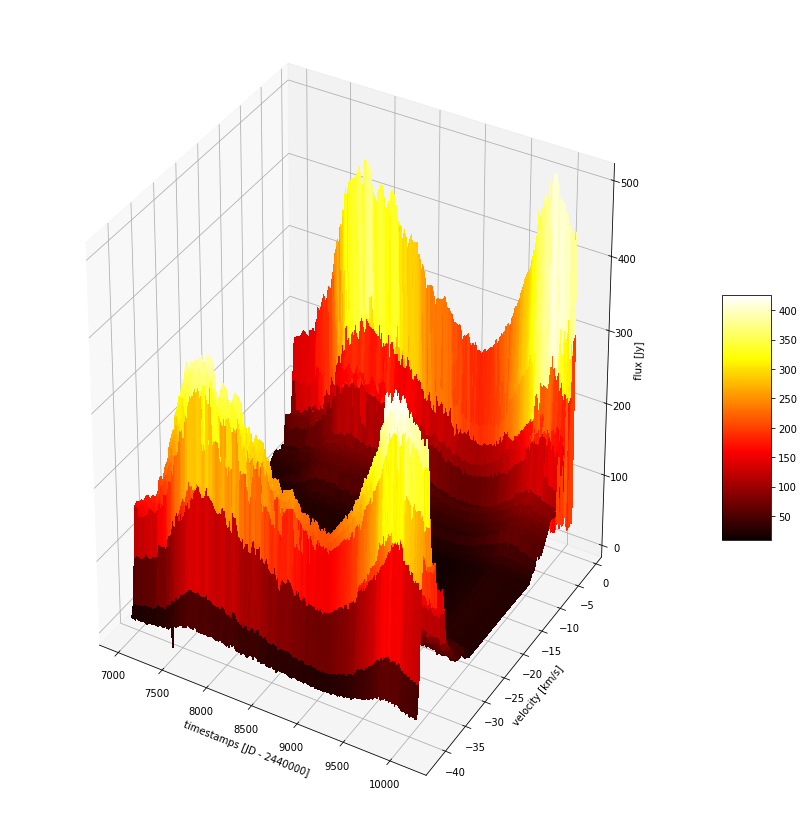

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15), facecolor='white')
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x,y,z, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.3, aspect=5)
ax.set_xlabel('timestamps [JD - 2440000]')
ax.set_ylabel('velocity [km/s]')
ax.set_zlabel('flux [Jy]')

Text(0.5,0,'flux [Jy]')

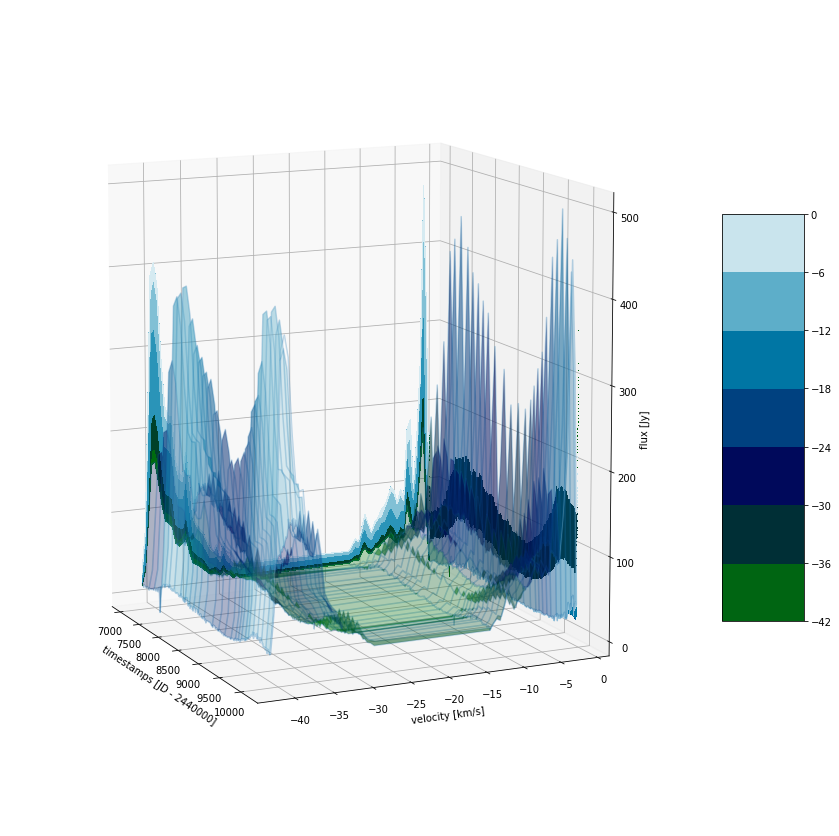

In [9]:
from matplotlib import cm
fig = plt.figure(figsize=(15, 15), facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, rstride=10, cstride=10, cmap=cm.ocean, alpha=0.3)
ax.plot_surface(x, y, z, rstride=10, cstride=10, cmap=cm.ocean, alpha=0.3)
cset = ax.contourf(x, y, z, zdir='x', offset=np.min(x), cmap=cm.ocean)
cset = ax.contourf(x, y, z, zdir='y', offset=np.max(y), cmap=cm.ocean)
fig.colorbar(cset, ax=ax, shrink=0.5, aspect=5)
ax.view_init(10, -25)
ax.set_xlabel('timestamps [JD - 2440000]')
ax.set_ylabel('velocity [km/s]')
ax.set_zlabel('flux [Jy]')

Text(0,0.5,'avg flux [Jy]')

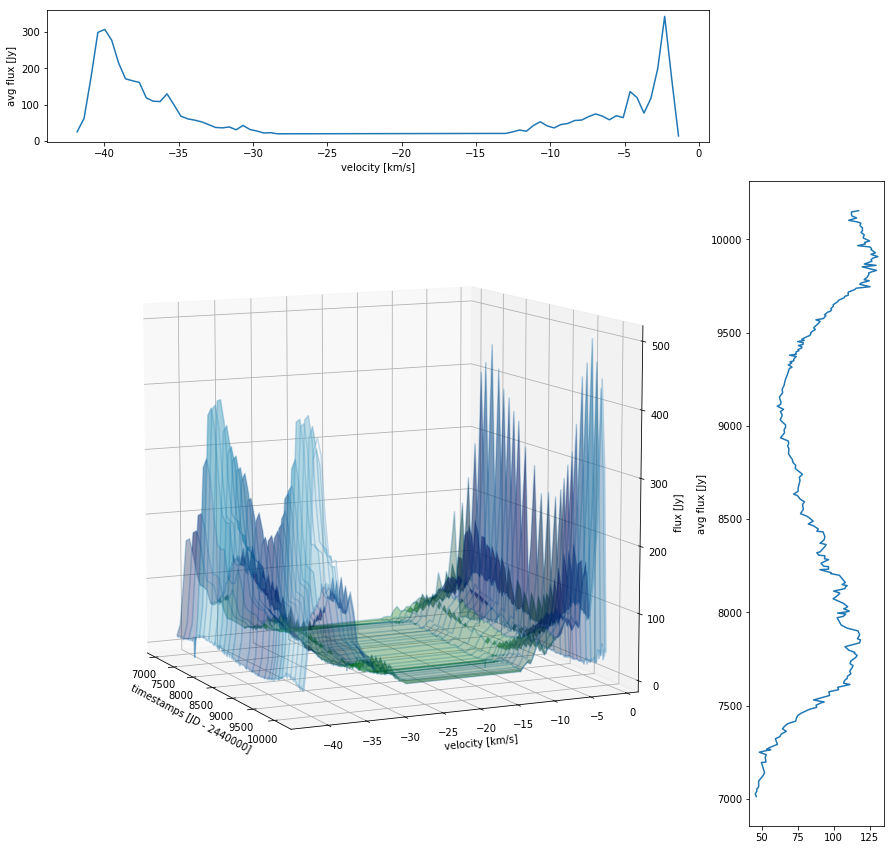

In [10]:
from matplotlib import gridspec
fig= plt.subplots(figsize=(15,15), facecolor='white')
gs = gridspec.GridSpec(5, 5, hspace=0.3, wspace=0.3)
ax0 = plt.subplot(gs[0, :-1])
ax0.plot(chan_vel, spectra.mean(axis=0))
ax0.set_xlabel('velocity [km/s]')
ax0.set_ylabel('avg flux [Jy]')

ax1 = plt.subplot(gs[1:, :-1], projection='3d')
ax1.plot_wireframe(x, y, z, rstride=10, cstride=10, cmap=cm.ocean, alpha=0.3)
ax1.plot_surface(x, y, z, rstride=10, cstride=10, cmap=cm.ocean, alpha=0.3)
ax1.view_init(10, -25)
ax1.set_xlabel('timestamps [JD - 2440000]')
ax1.set_ylabel('velocity [km/s]')
ax1.set_zlabel('flux [Jy]')

ax2 = plt.subplot(gs[1:, -1])
ax2.plot(spectra.mean(axis=1), timestamps)
ax2.set_ylabel('timestamps [JD - 2440000]')
ax2.set_ylabel('avg flux [Jy]')